In [ ]:
# In Class Lab 6
# Surface Brightness Profiles


In [4]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterofMass import CenterOfMass
from MassProfile import MassProfile
from GalaxyMass import ComponentMass

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `sersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [5]:
  def sersicE(r, re, n, mtot):
    """
    **assume mass/light = 1, ie mass and luminosity can be interchanged**
    Computes the Sersic profile for an elliptical galaxy

    Inputs:
        r: float
            distance from the center of the galaxy in kpc
        re: float
            effective radius (2d radius) that contains half the light in kpc
        n: float
            sersic index
        mtot: float
            the total stellar mass in Msun

    Outputs:
        I: array of floats
            the surface brightness profile of the elliptical Lsun/kpc^2
    """
    # we assume M/L ~ 1, so
    lum = mtot
    Ie = lum/7.2/np.pi/re**2

    # the surface profile (sersic profile), which we will break into steps because it's long
    a = (r/re)**(1/n)
    b = -7.67 * (a-1)
    I = Ie * np.exp(b)

    return I
    

# Part B

a) Create an instance of the MassProfile Class for M31. Store it as a variable `M31`. 


In [7]:
M31 = MassProfile("M31", 0)


b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [8]:
r = np.arange(0.1, 30, 0.1)


c) Define a new array called `bulge_mass`, that uses the function `MassEnclosed` within MassProfile to compute the mass profile of the bulge.  Get rid of astropy units in `bulge_mass` by adding `.value` 


In [12]:
bulge_mass = M31.MassEnclosed(3, r*u.kpc).value

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `bulge_I`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [13]:
bulge_I = bulge_mass/4/np.pi/r**2

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [14]:
#total bulge mass
bulge_total = ComponentMass("M31_000.txt", 3)*1e12
print(f"{bulge_total:.2e}")

1.90e+10


In [16]:
#half the total bulge mass
b_half = bulge_total/2
print(b_half)

9500000000.0


In [17]:
#at which radius is the bulge mass greater than 1/2 total mass

index = np.where(bulge_mass > b_half)
print(bulge_mass[index][0])

9501924509.999998


In [18]:
re_bulge = r[index][0]
print(re_bulge)

2.4000000000000004


# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

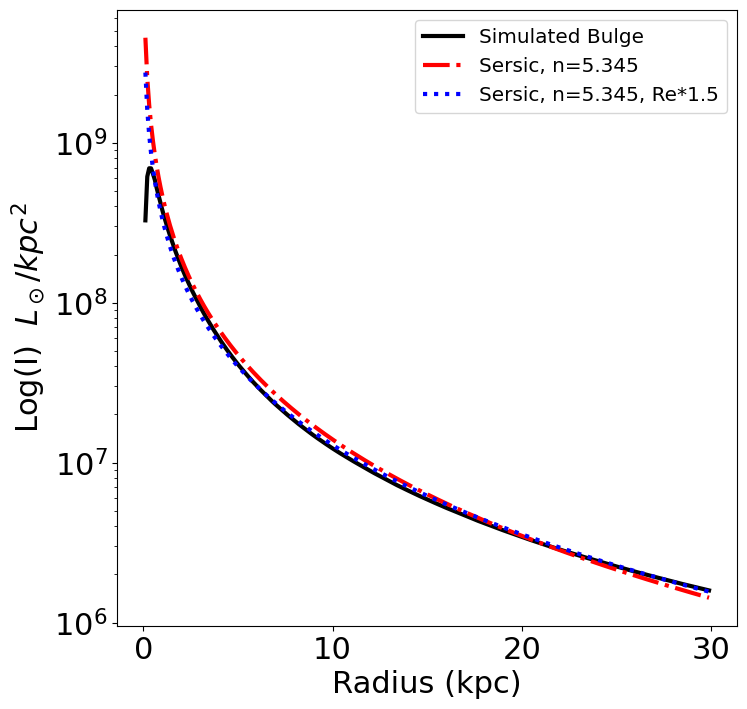

In [27]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)


# plot the bulge mass density as a proxy for surface brighntess
plt.semilogy(r, bulge_I, color = 'black', linewidth=3, label = 'Simulated Bulge')

# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 
plt.semilogy(r, sersicE(r, re_bulge, 5.345, bulge_total), color = 'red', linestyle = "-.", linewidth = 3, label = 'Sersic, n=5.345') #4 is based on devoculer profile
plt.semilogy(r, sersicE(r, re_bulge*1.5, 5.345, bulge_total), color = 'blue', linestyle = ":", linewidth = 3, label = 'Sersic, n=5.345, Re*1.5') #4 is based on devoculer profile

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')


plt.savefig('Lab6.png')